In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [6]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

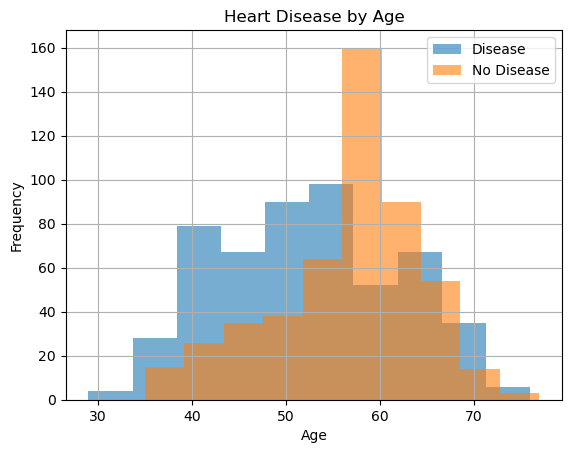

In [37]:
### To begin, we import matplotlib which is one of Python's library for visualization
import matplotlib.pyplot as plt

### Then we filter the dataset to reveal those patients with current know heart disease, 
### and with no current known heart diseases (target equals 1, for known disease; and target equals 0 for no known disease)
df[df['target'] == 1]['age'].hist(alpha=0.6, label='Disease')
df[df['target'] == 0 ]['age'].hist(alpha=0.6, label='No Disease')

### We use plt.legend() to show the labels on the plot
plt.legend()

### Then we provide names to the x and y axis, and then to the entire graph
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Heart Disease by Age')

### With those all done, we call plt.show() to display the plot
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('Training Size:', x_train.shape[0])
print('Testing ize:', x_test.shape[0])

Training Size: 820
Testing Size: 205


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 100000)

model.fit(x_train, y_train)

print('Model Training Complete!')

Model Training Complete!


In [32]:
predictions = model.predict(x_test)

print('Simple Predictions:', predictions[:10])

Simple Predictions: [1 1 0 1 0 1 0 0 1 0]


In [34]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

